# 網路爬蟲

## 載入selenium環境參數準備爬蟲

In [1]:
!wget https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/135.0.7049.84/linux64/chrome-linux64.zip -O chrome-linux64.zip
!unzip -q chrome-linux64.zip
!mv chrome-linux64 /opt/chrome

import os
os.environ['PATH'] += os.pathsep + "/opt/chrome"

!wget https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/135.0.7049.84/linux64/chromedriver-linux64.zip -O chromedriver.zip
!unzip -q chromedriver.zip
!mv chromedriver-linux64/chromedriver /usr/bin/chromedriver
!chmod +x /usr/bin/chromedriver

!pip install selenium > /dev/null


--2025-04-11 21:13:13--  https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/135.0.7049.84/linux64/chrome-linux64.zip
Resolving edgedl.me.gvt1.com (edgedl.me.gvt1.com)... 34.104.35.123, 2600:1900:4110:86f::
Connecting to edgedl.me.gvt1.com (edgedl.me.gvt1.com)|34.104.35.123|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://storage.googleapis.com/chrome-for-testing-public/135.0.7049.84/linux64/chrome-linux64.zip [following]
--2025-04-11 21:13:13--  https://storage.googleapis.com/chrome-for-testing-public/135.0.7049.84/linux64/chrome-linux64.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.207, 142.251.31.207, 142.251.18.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169532832 (162M) [application/zip]
Saving to: ‘chrome-linux64.zip’

chrome-linux64.zip  100%[===================>] 161.68M  40.8MB/s    in 

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--window-size=1920,1080")

driver = webdriver.Chrome(service=Service("/usr/bin/chromedriver"), options=chrome_options)

## 開始爬蟲，目標為bangumi上的動畫評論，記錄評論內容和分數

In [19]:
url = "https://bangumi.tv/subject/454684"+"/comments"
driver.get(url)
time.sleep(3)

rating = []
nextpage_times = 0
maxpage = float("inf")
while nextpage_times < maxpage:
  IDs = driver.find_elements(By.CLASS_NAME, "text")
  for ID in IDs:
    try:
      Comment = ID.find_element(By.CLASS_NAME, "comment")
      Score = ID.find_element(By.CLASS_NAME, "starstop-s")
      rating.append({
              "comment": Comment.text,
              "score": Score.find_element(By.XPATH, ".//*").get_attribute("class").replace("starlight stars","")
              })
    except:
      continue
  print(f"第 {nextpage_times+1}頁，評論總數：{len(rating)}")

  try:
      next_link = driver.find_element(By.LINK_TEXT, "››")
      next_link.click()
      nextpage_times += 1
      time.sleep(2)
  except NoSuchElementException:
      break

第 1頁，評論總數：18
第 2頁，評論總數：37
第 3頁，評論總數：57
第 4頁，評論總數：77
第 5頁，評論總數：97
第 6頁，評論總數：114
第 7頁，評論總數：132
第 8頁，評論總數：149
第 9頁，評論總數：169
第 10頁，評論總數：189
第 11頁，評論總數：209
第 12頁，評論總數：226
第 13頁，評論總數：243
第 14頁，評論總數：262
第 15頁，評論總數：280
第 16頁，評論總數：298
第 17頁，評論總數：315
第 18頁，評論總數：332
第 19頁，評論總數：349
第 20頁，評論總數：368
第 21頁，評論總數：387
第 22頁，評論總數：407
第 23頁，評論總數：424
第 24頁，評論總數：444
第 25頁，評論總數：462
第 26頁，評論總數：481
第 27頁，評論總數：501
第 28頁，評論總數：520
第 29頁，評論總數：540
第 30頁，評論總數：560
第 31頁，評論總數：579
第 32頁，評論總數：598
第 33頁，評論總數：618
第 34頁，評論總數：638
第 35頁，評論總數：655
第 36頁，評論總數：674
第 37頁，評論總數：693
第 38頁，評論總數：713
第 39頁，評論總數：733
第 40頁，評論總數：751
第 41頁，評論總數：768
第 42頁，評論總數：783
第 43頁，評論總數：803
第 44頁，評論總數：822
第 45頁，評論總數：839
第 46頁，評論總數：859
第 47頁，評論總數：877
第 48頁，評論總數：894
第 49頁，評論總數：914
第 50頁，評論總數：931
第 51頁，評論總數：950
第 52頁，評論總數：970
第 53頁，評論總數：987
第 54頁，評論總數：1007
第 55頁，評論總數：1026
第 56頁，評論總數：1045
第 57頁，評論總數：1064
第 58頁，評論總數：1084
第 59頁，評論總數：1104
第 60頁，評論總數：1123
第 61頁，評論總數：1143
第 62頁，評論總數：1162
第 63頁，評論總數：1182
第 64頁，評論總數：1200
第 65頁，評論總數：1219
第 66頁，評論總數：1239
第 67頁，評論總數：

## 畫出分數的分配比例圖

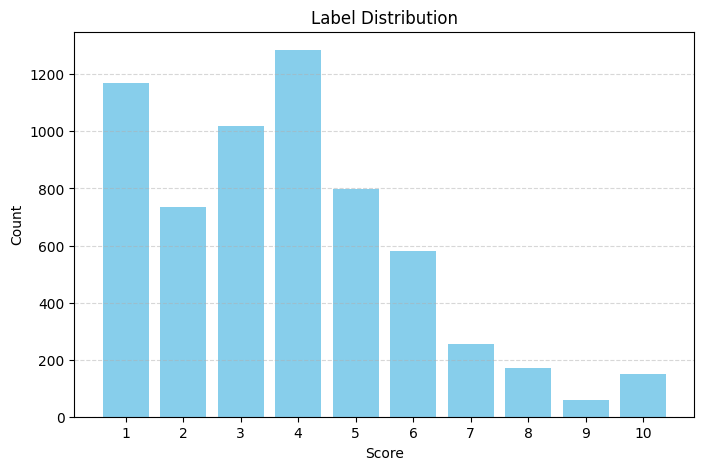

In [20]:
import matplotlib.pyplot as plt
from collections import Counter

labels = [int(item["score"]) for item in rating]
label_counts = Counter(labels)

x = sorted(label_counts.keys())
y = [label_counts[i] for i in x]

plt.figure(figsize=(8, 5))
plt.bar(x, y, color='skyblue')
plt.xlabel("Score")
plt.ylabel("Count")
plt.title("Label Distribution")
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


## 分割為train，validation和test三個檔案，並存為jsonl檔為後續fine tuning作準備

In [21]:
import json
import random
from sklearn.model_selection import train_test_split

random.seed(42)

train_data, temp_data = train_test_split(rating, test_size=0.2, random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

def save_jsonl(data, filename):
    with open(filename, "w", encoding="utf-8") as f:
        for item in data:
            f.write(json.dumps(item, ensure_ascii=False) + "\n")

save_jsonl(rating, "rating.jsonl")
save_jsonl(train_data, "train_data.jsonl")
save_jsonl(valid_data, "valid_data.jsonl")
save_jsonl(test_data, "test_data.jsonl")

# fine tuning model

## 下載hugging face的library作準備

In [1]:
!pip install transformers -q
!pip install datasets
import torch

from datasets import Dataset


## 讀取爬蟲時存下的jsonl檔

In [2]:
train_dataset = Dataset.from_json("train_data.jsonl")
valid_dataset = Dataset.from_json("valid_data.jsonl")
test_dataset = Dataset.from_json("test_data.jsonl")

## Tokenize，並將分數label簡化為三類以得到更好的training效果

In [3]:
from transformers import AutoTokenizer, BertTokenizer, AutoModelForSequenceClassification, BertForSequenceClassification, DataCollatorWithPadding
import math

tokenizer = AutoTokenizer.from_pretrained('uer/roberta-small-word-chinese-cluecorpussmall')

def map_to_3class(score):
    s = int(score)
    if s <= 3:
        return 0
    elif s <= 7:
        return 1
    else:
        return 2

def tokenize_function(dataset):
    tokenized = tokenizer(dataset["comment"], truncation=True)
    tokenized["labels"] = [map_to_3class(s) for s in dataset["score"]]
    return tokenized

def preprocess_function(dataset):
    PreprocessData = dataset.map(tokenize_function, batched=True)
    PreprocessData = PreprocessData.remove_columns(["comment", "score"])
    return PreprocessData

tokenize_train_datasets = preprocess_function(train_dataset)
tokenize_valid_datasets = preprocess_function(valid_dataset)
tokenize_test_datasets = preprocess_function(test_dataset)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## 開始training

### 設定模型參數

In [4]:
import torch
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import trainer, get_scheduler, DataCollatorWithPadding
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tqdm import tqdm

model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-small-word-chinese-cluecorpussmall", num_labels=5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

batch_size = 32
num_epochs = 100
model_name = "AnimeComment"

train_loader = DataLoader(tokenize_train_datasets, batch_size=batch_size, shuffle=True, collate_fn=data_collator)
eval_loader = DataLoader(tokenize_valid_datasets, batch_size=batch_size, collate_fn=data_collator)

# Optimizer & Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.05)
num_training_steps = len(train_loader) * num_epochs
warmup_steps = num_training_steps * 0.1
lr_scheduler = get_scheduler(
    "cosine",
    optimizer=optimizer,
    num_warmup_steps=warmup_steps,
    num_training_steps=num_training_steps
)

# compute metrics
def compute_metrics(preds, labels):
    preds = torch.argmax(preds, dim=-1).cpu().numpy()
    labels = labels.cpu().numpy()
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': round(acc, 4),
        'precision': round(precision, 4),
        'recall': round(recall, 4),
        'f1': round(f1, 4)
    }

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at hfl/chinese-macbert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1626: FutureWarning: using `no_cuda` is deprecated and will be removed in version 5.0 of 🤗 Transformers. Use `use_cpu` instead
  warnings.warn(
<ipython-input-4-a6fe9279d96b>:69: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.753400,0.624685,0.834483,0.696361,0.834483,0.759191
2,0.678600,0.564072,0.834483,0.696361,0.834483,0.759191


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=292, training_loss=0.8382787606487535, metrics={'train_runtime': 4246.6665, 'train_samples_per_second': 0.547, 'train_steps_per_second': 0.069, 'total_flos': 162044802574284.0, 'train_loss': 0.8382787606487535, 'epoch': 2.0})

### 開始training

In [5]:
# data for picture drawing
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Early stopping parameter
best_f1 = 0
patience_counter = 0
early_stopping_patience = 5

# training epochs
for epoch in range(num_epochs):
    # train
    model.train()
    total_loss = 0
    correct_preds = 0
    total_preds = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        total_loss += loss.item()
        preds = torch.argmax(outputs.logits, dim=-1)
        correct_preds += (preds == batch["labels"]).sum().item()
        total_preds += batch["labels"].size(0)

    epoch_train_loss = total_loss / len(train_loader)
    epoch_train_accuracy = correct_preds / total_preds
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_accuracy)
    print(f"Epoch {epoch+1}: Train Loss = {epoch_train_loss:.4f}, Train Accuracy = {epoch_train_accuracy:.4f}")

    # evaluate
    model.eval()
    all_preds = []
    all_labels = []
    eval_loss = 0
    correct_preds = 0
    total_preds = 0
    with torch.no_grad():
        for batch in tqdm(eval_loader, desc="Evaluating"):
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            eval_loss += outputs.loss.item()
            preds = torch.argmax(outputs.logits, dim=-1)
            correct_preds += (preds == batch["labels"]).sum().item()
            total_preds += batch["labels"].size(0)
            all_preds.append(outputs.logits)
            all_labels.append(batch["labels"])

    epoch_eval_loss = eval_loss / len(eval_loader)
    epoch_eval_accuracy = correct_preds / total_preds
    val_losses.append(epoch_eval_loss)
    val_accuracies.append(epoch_eval_accuracy)

    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)
    metrics = compute_metrics(all_preds, all_labels)
    print(f"Validation Loss: {epoch_eval_loss:.4f}, Validation Accuracy: {epoch_eval_accuracy:.4f}, Metrics: {metrics}")

    final_epoch = epoch

    # Early Stopping & Save
    if metrics["f1"] > best_f1:
        best_f1 = metrics["f1"]
        patience_counter = 0
        torch.save(model.state_dict(), "best_model.pt")
        print("Model saved.")
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at hfl/chinese-macbert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🧪 Checking batch 0
input_ids: shape=torch.Size([32, 118]), dtype=torch.int64, device=cpu
token_type_ids: shape=torch.Size([32, 118]), dtype=torch.int64, device=cpu
attention_mask: shape=torch.Size([32, 118]), dtype=torch.int64, device=cpu
labels: shape=torch.Size([32]), dtype=torch.int64, device=cpu
Labels: tensor([3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        4, 3, 3, 3, 3, 3, 3, 3])
Unique labels in batch: tensor([3, 4])
✅ Batch 0 passed. Loss: 1.4046

🧪 Checking batch 1
input_ids: shape=torch.Size([32, 191]), dtype=torch.int64, device=cpu
token_type_ids: shape=torch.Size([32, 191]), dtype=torch.int64, device=cpu
attention_mask: shape=torch.Size([32, 191]), dtype=torch.int64, device=cpu
labels: shape=torch.Size([32]), dtype=torch.int64, device=cpu
Labels: tensor([3, 3, 3, 3, 4, 3, 3, 4, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 4, 3])
Unique labels in batch: tensor([2, 3, 4])
✅ Batch 1 passed. Loss: 1.4712

🧪 Checking

### 畫出learning curve

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, final_epoch + 2), train_losses, 'b-', label="Train Loss")
plt.plot(range(1, final_epoch + 2), val_losses, 'b--', label="Val Loss")
plt.plot(range(1, final_epoch + 2), train_accuracies, 'r-', label="Train Accuracy")
plt.plot(range(1, final_epoch + 2), val_accuracies, 'r--', label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: camelmaycry (camelmaycry-none) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


### 儲存model參數

In [ ]:
model.save_pretrained(f"{model_name}_best")
tokenizer.save_pretrained(f"{model_name}_best")

## 開始testing

In [ ]:
def test_model(model, test_dataset, tokenizer, batch_size=32, device="cuda"):
    model.eval()
    model.to(device)

    test_dataloader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        collate_fn=data_collator
    )

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in test_dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=-1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch["labels"].cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')

    print(f"Test Accuracy: {acc:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"Test F1 Score: {f1:.4f}")

    return all_preds, all_labels

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_preds, test_labels = test_model(model, tokenize_test_datasets, tokenizer, batch_size=32, device=device)

## inference

### 設定inference功能

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_path = "AnimeComment_best"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

def inference_function(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=512)

    inputs = {key: val.to(device) for key, val in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)

    return predictions.cpu().numpy()

### 實測inference

In [ ]:
test_text = "祥子與他的伙伴們的過家家，最後大團圓也拉不回分數"
prediction = inference_function(test_text)
print(f"Predicted label: {prediction}")